In [29]:
import nltk

In [30]:
TEXT_DIR = 'output/'

In [31]:
def buildCorpus():
    from nltk.corpus import PlaintextCorpusReader
    return PlaintextCorpusReader(TEXT_DIR, '.*')

In [32]:
corpus = buildCorpus()
fileids = corpus.fileids()
fileids = fileids[0:10]
for fileid in fileids:
    num_chars = len(corpus.raw(fileid))
    num_words = len(corpus.words(fileid))
    num_sents = len(corpus.sents(fileid))
    num_vocab = len(set([w.lower() for w in corpus.words(fileid)]))
    print(str(round(num_chars/num_words))+", "+str(round(num_words/num_sents))+", "+str(round(num_words/num_vocab))+" : "+fileid)


8, 9, 2 : aa100180.txt
6, 14, 2 : aa100355.txt
7, 14, 2 : aa100367.txt
5, 16, 5 : aa10253.txt
5, 15, 2 : aa102542.txt
6, 14, 2 : aa102611.txt
6, 15, 2 : aa102618.txt
6, 14, 10 : aa103080.txt
5, 14, 2 : aa103823.txt
6, 18, 2 : aa104339spec.txt


In [33]:
print(corpus.sents())

[['Polyhydramnios'], ['Polyhydramnios', 'is', 'a', 'condition', 'in', 'which', 'there', 'is', 'too', 'much', 'fluid', 'in', 'the', 'amniotic', 'sac', ',', 'the', 'sac', 'that', 'holds', 'the', 'developing', 'baby', '(', 'fetus', ').'], ...]


_Frequenc Distribution_ - counter object - mapping of a word to an integer (its count)

If we count the number of keys, those are unique words - vocabulary
Word count = sum of the values 
Lexical diversity - average number of times a word occurs X times

In [34]:
counts  = nltk.FreqDist(corpus.words())
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

In [35]:
print("Corpus has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Corpus has 125771 types and 21041445 tokens for a lexical diversity of 167.300


In [36]:
print(counts.most_common(40))

[('.', 1050526), (',', 952411), ('the', 535215), ('of', 471119), ('to', 402333), ('and', 398260), ('a', 322038), ('or', 303463), ('-', 284433), ('in', 254085), ('your', 244256), ('you', 223964), ('is', 196098), ('with', 191036), ('(', 173780), ('for', 166229), ('may', 141359), (':', 135995), ('that', 135743), ('not', 119165), ('have', 115758), ('are', 113398), ('be', 109927), ('can', 101855), ('as', 93200), ("'", 88633), ('doctor', 86967), ('if', 75581), ('The', 73172), (')', 70036), ('on', 66105), ('by', 66100), ('this', 63133), ('cancer', 62820), ('an', 60376), ('it', 58795), ('s', 54377), ('You', 53502), ('about', 51671), (';', 50259)]


In [37]:
print(counts.hapaxes()[0:1000])

['Conjoined', 'Siamese', 'Electrode', 'Ate', 'Argument', 'amniocentesisCompare', 'Trager', 'dancelike', 'Mentastics', 'Rolfing', 'Corsets', 'critics', 'CNME', 'accredit', 'goong', 'headstand', 'vacuumed', 'ALH', 'bradyarrhythmias', 'allspice', 'Digest', 'refillable', 'curdling', 'crosscut', 'DecisionsThe', 'Disbelief', 'Disappointment', 'adust', 'snip', 'Weeds', 'Grasses', 'Trees', 'Hevea', 'brasiliensis', 'Glove', 'nonlatex', 'PointMenopause', 'HTCompare', 'intelligently', 'aarp', 'grandchild', 'Zip', 'Interpreters', 'Accredited', 'deactivated', 'aha', 'piiw', 'Resolve', 'unsaid', 'forgets', 'storybook', 'DietLearning', 'Tetrachloroethylene', 'ANCA', 'hypoperfusion', 'PointScoliosis', 'OrthopedicsYou', 'OrthopedicsNote', 'governs', 'greed', 'dosha', 'PointAbnormal', 'bleedingCompare', 'Reclosure', 'achondroplastic', 'ESIs', 'unwillingly', 'Sulfinpyrazone', 'Probalan', 'yearsfootnote', 'PointHyperthyroidism', '1Radioactive', '2Radioactive', 'medicineActually', 'BothActually', 'mildYou'

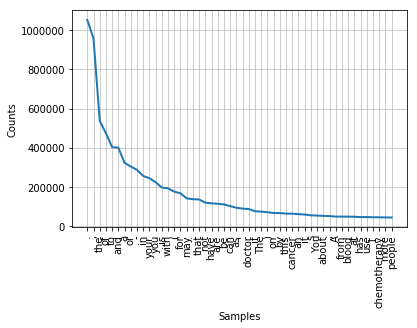

In [15]:
counts.plot(50, cumulative=False)

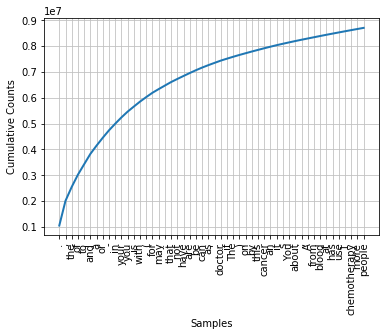

In [16]:
# By setting cumulative to True, we can visualize the cumulative counts of the _n_ most common words.
counts.plot(50, cumulative=True)
